In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("q_WebWorks_QFERGeneratorMonthlyDescriptive_Table.txt")
df["Classification"]=df["CECPlantID"].astype(str).str[0]

In [3]:
Solar = df[df["Classification"]=="S"]
Gas = df[df["Classification"]=="G"] 
Hydro = df[df["Classification"]=="H"] 
Wind = df[df["Classification"]=="W"] 
Geothermal = df[df["Classification"]=="T"]
Nuclear = df[df["Classification"]=="N"] 
Coal = df[df["Classification"]=="C"]
Biomass = df[df["Classification"]=="E"]

In [4]:
Years = np.arange(2001,2019)
Years_s = np.arange(1,19)
Solar_Efficiency=[]
Wind_Efficiency=[]
Geothermal_Efficiency=[]
Hydro_Efficiency=[]
for year in Years:
    Solar_Efficiency.append(Solar[Solar["Year"]==year]["NetMWh"].sum()/Solar[Solar["Year"]==year]["Capacity"].sum())
    Wind_Efficiency.append(Wind[Wind["Year"]==year]["NetMWh"].sum()/Wind[Wind["Year"]==year]["Capacity"].sum())
    Geothermal_Efficiency.append(Geothermal[Geothermal["Year"]==year]["NetMWh"].sum()/Geothermal[Geothermal["Year"]==year]["Capacity"].sum())
    Hydro_Efficiency.append(Hydro[Hydro["Year"]==year]["NetMWh"].sum()/Hydro[Hydro["Year"]==year]["Capacity"].sum())

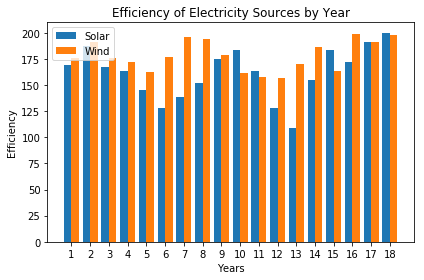

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
width = 0.4
ax.bar(Years - width/2, Solar_Efficiency, width, label='Solar')
ax.bar(Years + width/2, Wind_Efficiency, width, label="Wind")
ax.set_ylabel('Efficiency')
ax.set_xlabel('Years')
ax.set_title('Efficiency of Electricity Sources by Year')
ax.set_xticks(Years)
ax.set_xticklabels(Years_s)
ax.legend()
fig.tight_layout()
plt.show()